In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
df = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [10]:
X = df.copy()
X_2 = pd.DataFrame()
X_2 = pd.get_dummies(X["smoking_history"], prefix="smk_hist")

X_3 = pd.DataFrame()
X_3 = pd.get_dummies(X["gender"], prefix="gender")

In [11]:
X_new = X.join([X_2,X_3])
X_new.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,smk_hist_No Info,smk_hist_current,smk_hist_ever,smk_hist_former,smk_hist_never,smk_hist_not current,gender_Female,gender_Male,gender_Other
0,Female,80.0,0,1,never,25.19,6.6,140,0,False,False,False,False,True,False,True,False,False
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,True,False,False,False,False,False,True,False,False
2,Male,28.0,0,0,never,27.32,5.7,158,0,False,False,False,False,True,False,False,True,False
3,Female,36.0,0,0,current,23.45,5.0,155,0,False,True,False,False,False,False,True,False,False
4,Male,76.0,1,1,current,20.14,4.8,155,0,False,True,False,False,False,False,False,True,False


In [12]:
X_new = X_new.drop(columns=['gender','smoking_history'], axis=0)
X_new.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smk_hist_No Info,smk_hist_current,smk_hist_ever,smk_hist_former,smk_hist_never,smk_hist_not current,gender_Female,gender_Male,gender_Other
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,True,False,True,False,False
1,54.0,0,0,27.32,6.6,80,0,True,False,False,False,False,False,True,False,False
2,28.0,0,0,27.32,5.7,158,0,False,False,False,False,True,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,True,False,False,False,False,True,False,False
4,76.0,1,1,20.14,4.8,155,0,False,True,False,False,False,False,False,True,False


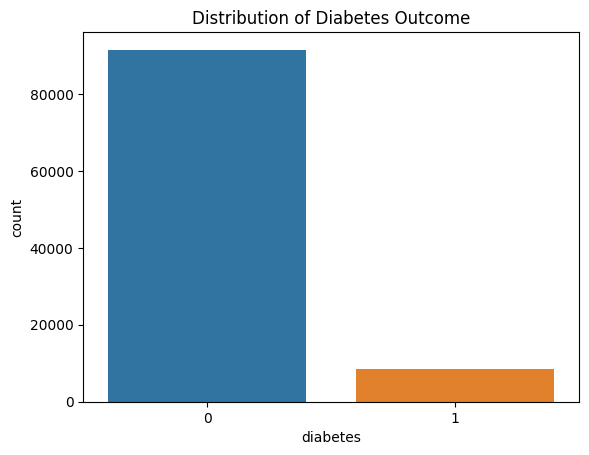

In [13]:
# Visualize the distribution of the target variable
sns.countplot(x='diabetes', data=X_new)
plt.title('Distribution of Diabetes Outcome')
plt.show()

In [14]:
y = X_new.pop('diabetes')
X_new.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'smk_hist_No Info', 'smk_hist_current',
       'smk_hist_ever', 'smk_hist_former', 'smk_hist_never',
       'smk_hist_not current', 'gender_Female', 'gender_Male', 'gender_Other'],
      dtype='object')

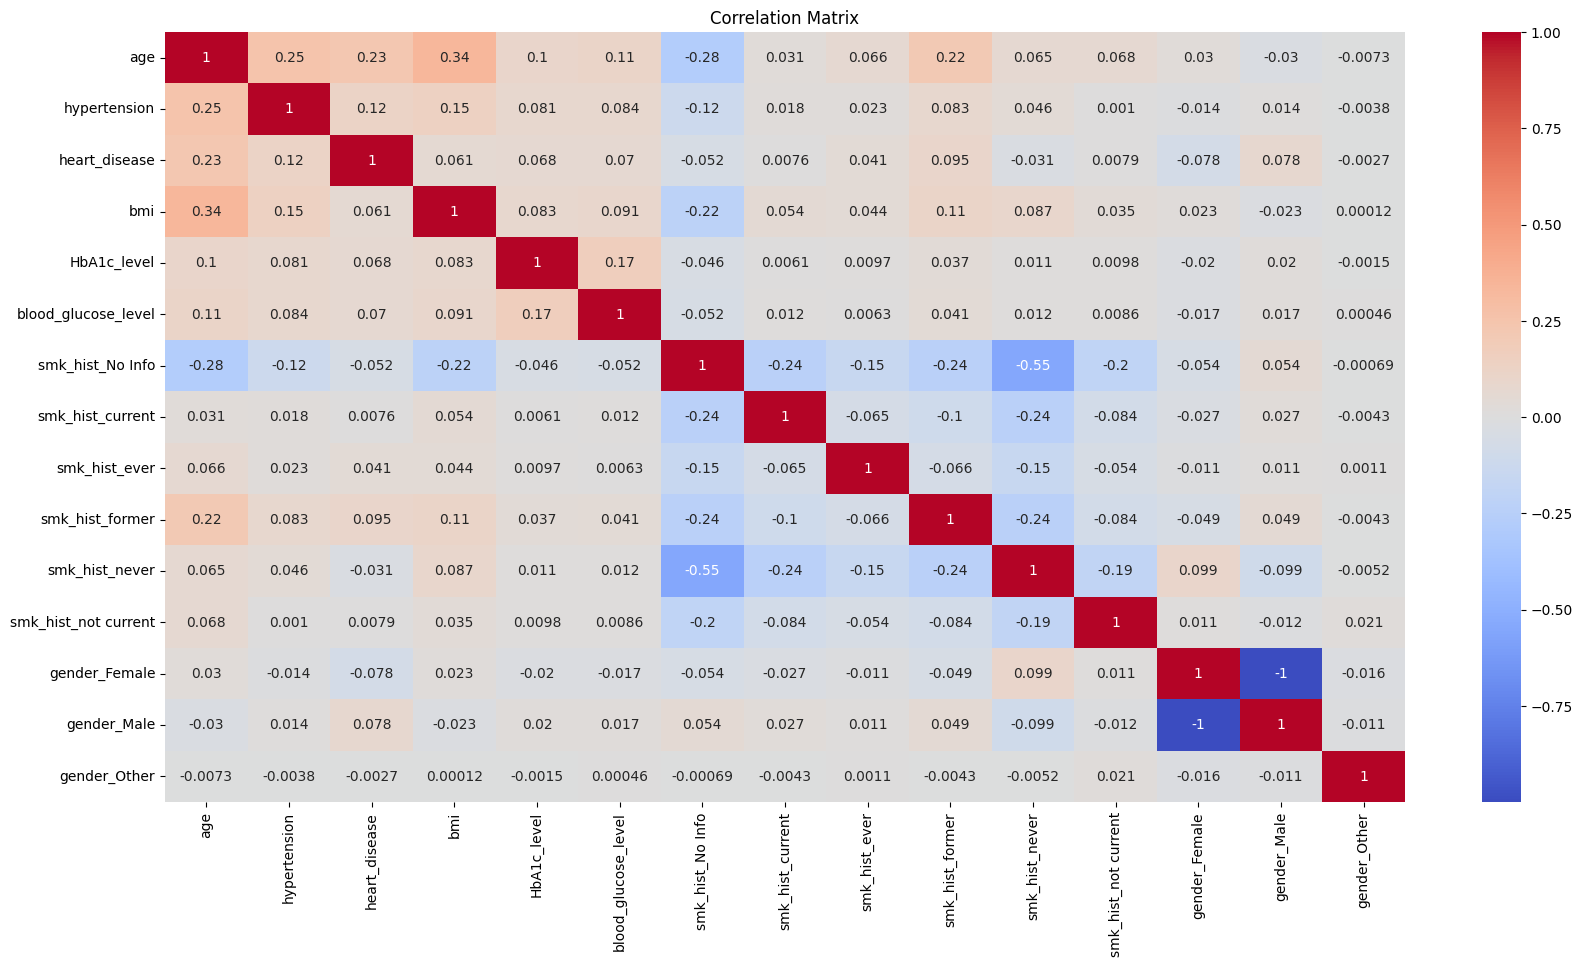

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(X_new.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
X = X_new.copy()
y = y

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [13]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [14]:
# Decision Tree Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

Decision Tree Classifier:
 Accuracy: 0.9515
 Precision: 0.7044060234244284
 Recall: 0.7416324133881386
 F1 Score: 0.7225400457665904


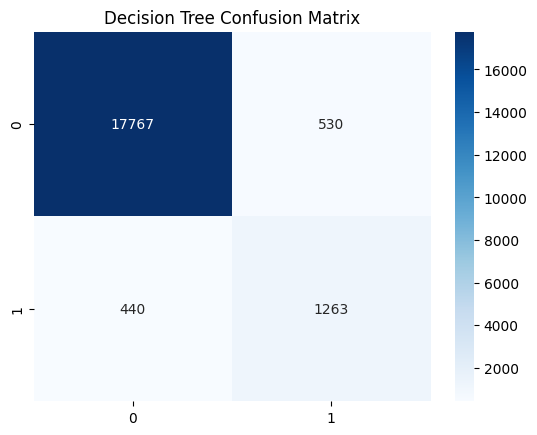

In [15]:
print(f'Decision Tree Classifier:\n Accuracy: {accuracy_dt}\n Precision: {precision_dt}\n Recall: {recall_dt}\n F1 Score: {f1_dt}')
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [16]:
# from sklearn.tree import plot_tree
# plt.figure(figsize=(15, 10))
# plot_tree(dt_model, filled=True, rounded=True, class_names=['Class 0', 'Class 1'], feature_names=y)
# plt.show()

In [17]:
# Logistic Regression
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [18]:
# Logistic regression Evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

Logistic Regression:
 Accuracy: 0.9609
 Precision: 0.8578088578088578
 Recall: 0.6482677627715796
 F1 Score: 0.7384615384615385


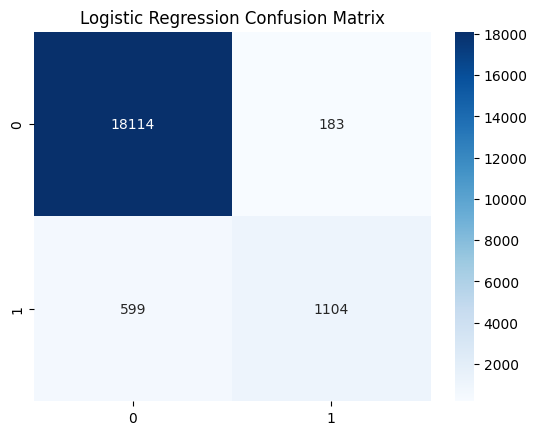

In [19]:
print(f'Logistic Regression:\n Accuracy: {accuracy_lr}\n Precision: {precision_lr}\n Recall: {recall_lr}\n F1 Score: {f1_lr}')
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [20]:
svm_model = SVC(random_state=0)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [22]:
# SVM Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

Support Vector Machine:
 Accuracy: 0.9632
 Precision: 0.9726295210166178
 Recall: 0.5842630651790958
 F1 Score: 0.7300073367571533


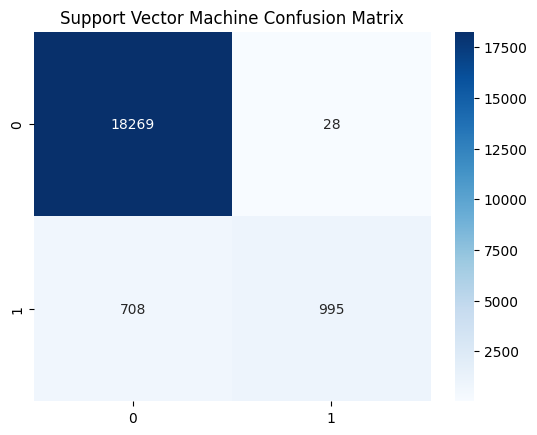

In [23]:
print(f'Support Vector Machine:\n Accuracy: {accuracy_svm}\n Precision: {precision_svm}\n Recall: {recall_svm}\n F1 Score: {f1_svm}')
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

In [28]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [29]:
# Naive Bayes Evaluation
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

Naive Bayes:
 Accuracy: 0.3009
 Precision: 0.10842528222463167
 Recall: 0.9982384028185555
 F1 Score: 0.19560464848694048


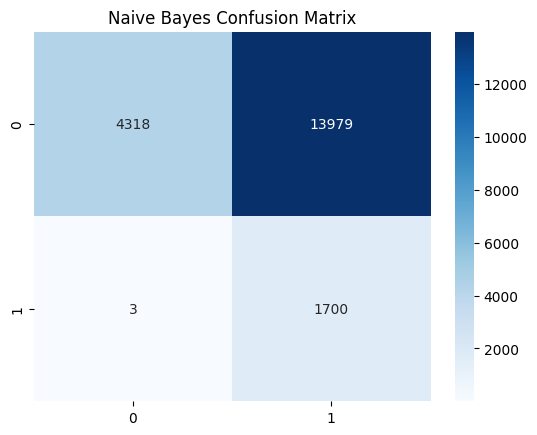

In [30]:
print(f'Naive Bayes:\n Accuracy: {accuracy_nb}\n Precision: {precision_nb}\n Recall: {recall_nb}\n F1 Score: {f1_nb}')
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [33]:
# Random Forest Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

Random Forest:
 Accuracy: 0.9705
 Precision: 0.9477071600965407
 Recall: 0.6917204932472109
 F1 Score: 0.7997284453496266


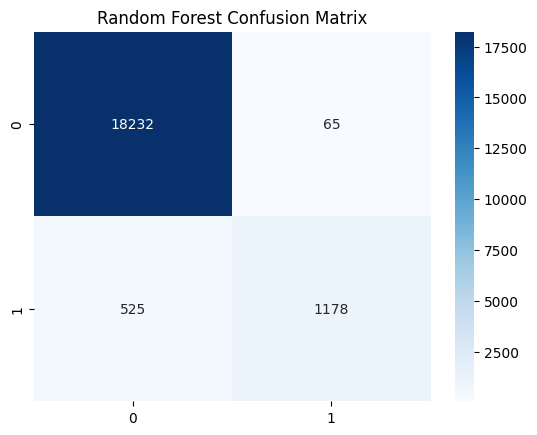

In [34]:
print(f'Random Forest:\n Accuracy: {accuracy_rf}\n Precision: {precision_rf}\n Recall: {recall_rf}\n F1 Score: {f1_rf}')
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [18]:
X = X.copy()
y = y.copy()

In [21]:
X_1 = pd.DataFrame()
X_1['bmi_bin'] = pd.cut((X['bmi']),3, labels=['underweight', 'healthy', 'overweight'])


In [22]:
X = X.join([X_1])

In [27]:
X_2 = pd.DataFrame()
X_2 = pd.get_dummies(X["bmi_bin"], prefix="bmi")

In [28]:
X = X.join([X_2])

In [30]:
X_new = X.drop(columns=['bmi_bin'], axis=0)

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [33]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [38]:
# Random Forest Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

Random Forest:
 Accuracy: 0.97065
 Precision: 0.9492753623188406
 Recall: 0.6923076923076923
 F1 Score: 0.800679117147708


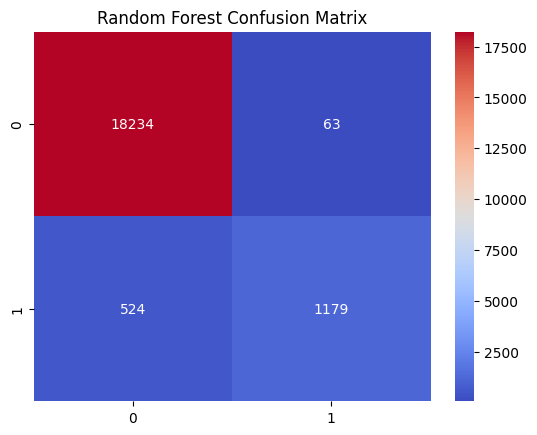

In [39]:
print(f'Random Forest:\n Accuracy: {accuracy_rf}\n Precision: {precision_rf}\n Recall: {recall_rf}\n F1 Score: {f1_rf}')
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='coolwarm')
plt.title('Random Forest Confusion Matrix')
plt.show()